In [1]:
import os, glob
import numpy as np
import pandas as pd
from scipy import signal
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pyfunctions import vpd_from_rh
import warnings
warnings.filterwarnings('ignore')

### View meteorological, sapflow, & dendrometer data at US-Me6

In [2]:
# readin meta data
meta_data = pd.read_csv('../data/Me6_dendrometer_metadata.csv',index_col=0)

In [3]:
# readin meteorological data
start_date = datetime(2022,7,1,0,0,0)
end_date = datetime(2022,8,31,23,30,0)
freq = '30min'

in_dir = '../data/'
in_file = in_dir + 'US-Me6_HH_202207010000_202209010000.csv'
met = pd.read_csv(in_file,header=0, squeeze=True)
met.index = pd.date_range(start_date,end_date,freq=freq)
met[met<-9000]=np.NaN
met['vpd'] = vpd_from_rh(met['TA_1_1_1'],met['RH'])

In [4]:
# readin sapflow data
start_date = datetime(2022,1,14,0,0,0)
end_date = datetime(2022,9,1,23,30)
freq = '30min'

in_dir = '../data/'
in_file=in_dir + 'USMe6_transpiration_2022_14_244_30min_LRH.csv'
sapflow = pd.read_csv(in_file,header=0,squeeze=True)
sapflow[sapflow<-9000]=np.NaN
sapflow.index = pd.date_range(start_date,end_date,freq=freq)

In [5]:
# readin dendrometer data
st = datetime(2022,6,1) 
dendro = pd.DataFrame(index = pd.date_range(datetime(2022,1,1),datetime(2022,12,31),freq='15min'))

in_dir = '../data/dendrometer/2022-09-29/raw/'
for file in sorted(glob.iglob(f'{in_dir}'+'data*.csv')):
    idx = file[40:48]
    df = pd.read_csv(file,sep = ';',decimal=',',header=None,index_col=1, parse_dates=True, squeeze=True)
    df = df[6].reindex_like(dendro)
    #dendro[idx] = df[6][st:] - df[6][st]
    dendro[idx] = df
  
dendro.index = dendro.index + timedelta(hours = -7) # convert to pacific daylight time = GMT-7

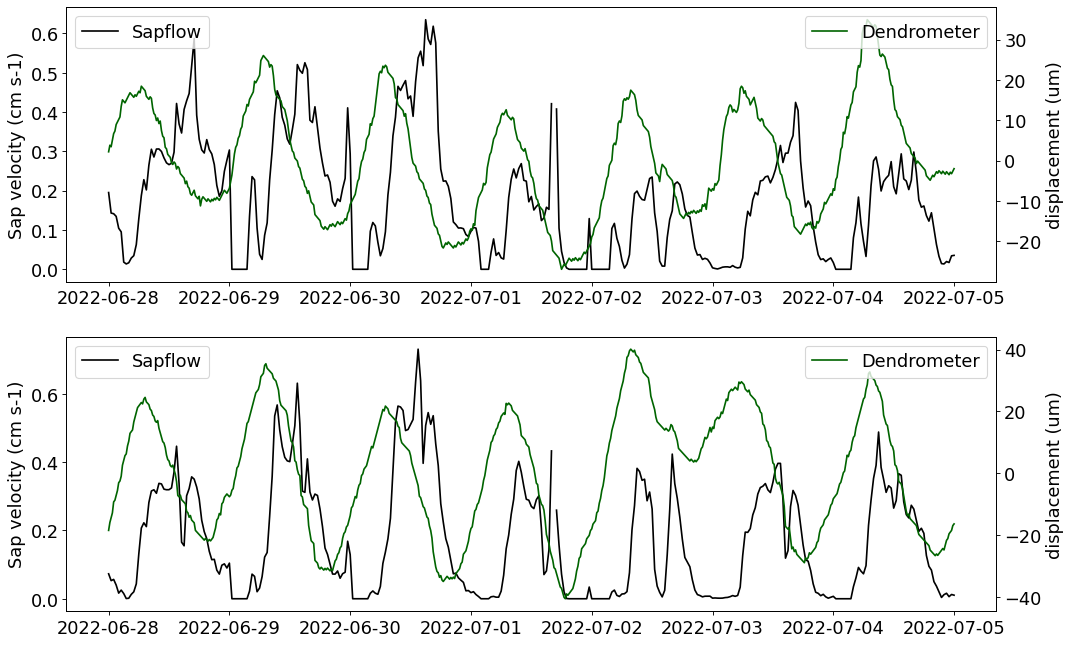

In [6]:
# plot sapflow and dendrometer data
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

start_date = datetime(2022,6,28); 
end_date = datetime(2022,7,5)

treeIDs = [704,707]
meta_data_tree = meta_data.loc[meta_data['organ']=='trunk']

for i,t in enumerate(treeIDs):

    ax1 = plt.subplot(2,1,i+1)
    ax1.plot(sapflow['u_'+str(meta_data_tree['sapflowID'][t])+'[cm3 s-1]'][start_date:end_date],color='k',label='Sapflow')
    ax1.set_ylabel('Sap velocity (cm s-1)')
    ax2 = ax1.twinx()
    y_dendro = signal.detrend(dendro[str(meta_data_tree['dendrometerID'][t])][start_date:end_date], axis=- 1, type='linear')
    ax2.plot(dendro[start_date:end_date].index,y_dendro,color='darkgreen',label='Dendrometer')
    ax2.set_ylabel('displacement (um)')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
#plt.savefig('US-Me6_PointDendro(detrended)_sapflow_6-28-2022_7-5-2022.png',dpi=300)  

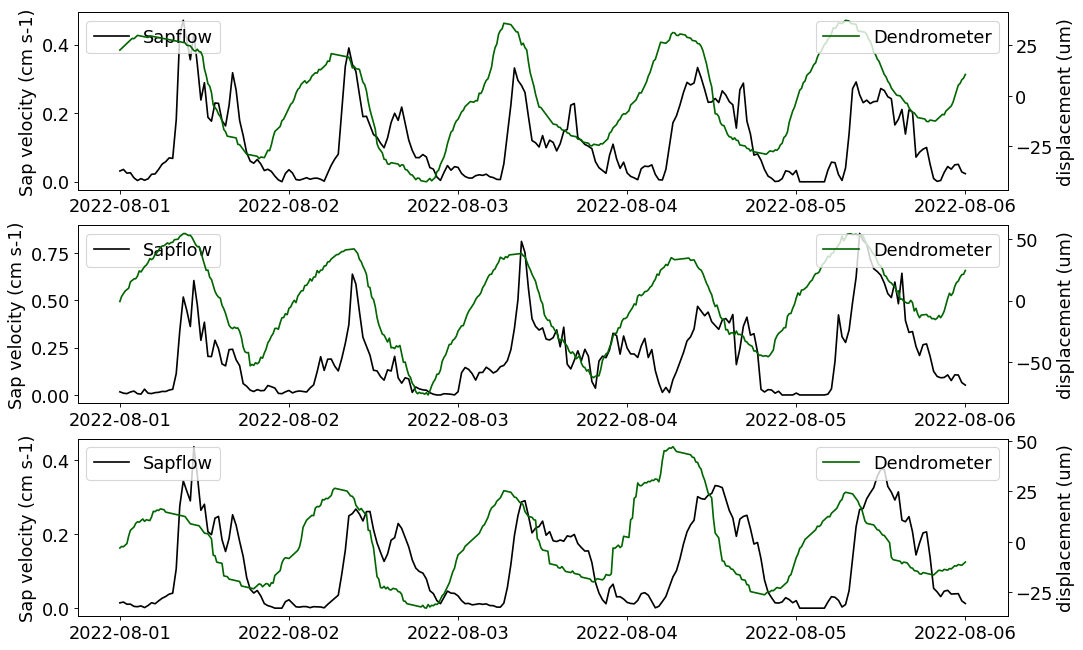

In [7]:
# plot sapflow and dendrometer data
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

start_date = datetime(2022,8,1); 
end_date = datetime(2022,8,6)

treeIDs = [704,707,710]
meta_data_tree = meta_data.loc[meta_data['organ']=='trunk']

for i,t in enumerate(treeIDs):

    ax1 = plt.subplot(3,1,i+1)
    ax1.plot(sapflow['u_'+str(meta_data_tree['sapflowID'][t])+'[cm3 s-1]'][start_date:end_date],color='k',label='Sapflow')
    ax1.set_ylabel('Sap velocity (cm s-1)')
    ax2 = ax1.twinx()
    y_dendro = signal.detrend(dendro[str(meta_data_tree['dendrometerID'][t])][start_date:end_date], axis=- 1, type='linear')
    ax2.plot(dendro[start_date:end_date].index,y_dendro,color='darkgreen',label='Dendrometer')
    ax2.set_ylabel('displacement (um)')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.savefig('US-Me6_PointDendro(detrended)_sapflow_8-1_8-5_2022.png',dpi=300)  

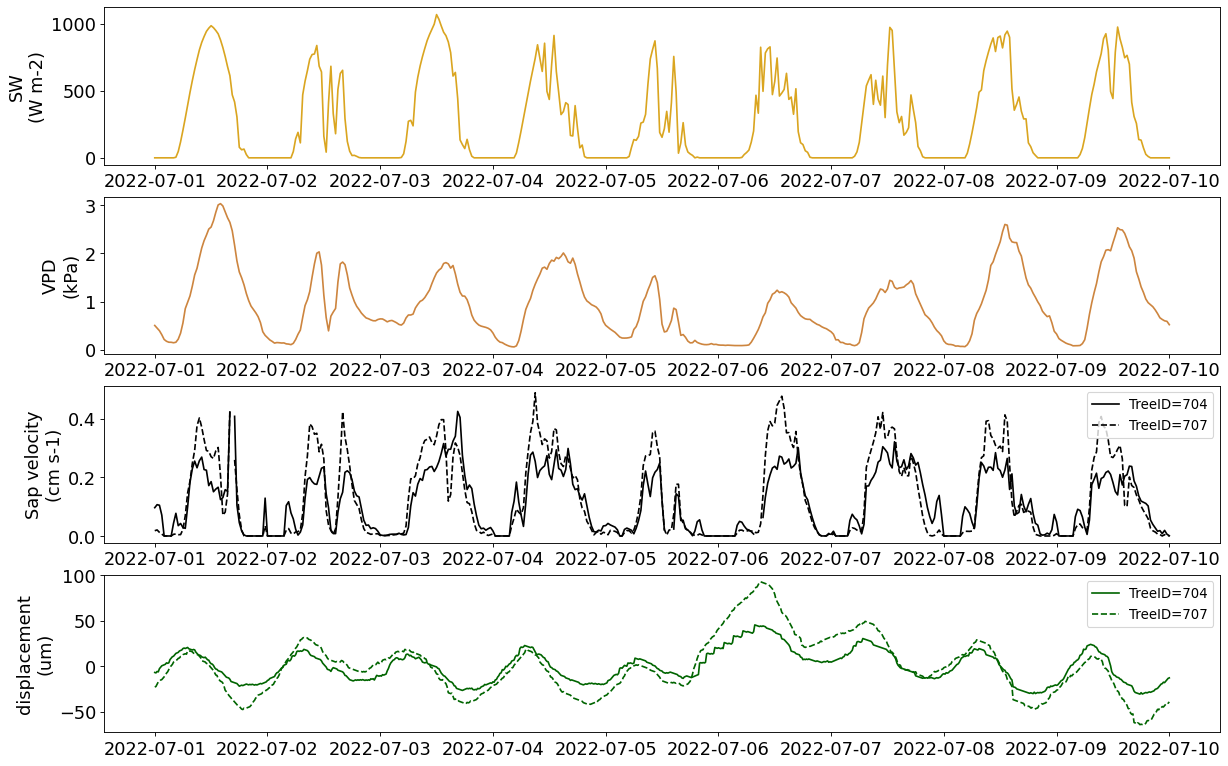

In [8]:
# plot sapflow and dendrometer data
plt.figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

st = datetime(2022,7,1); 
en = datetime(2022,7,10)

treeIDs = [704,707]
meta_data_tree = meta_data.loc[meta_data['organ']=='trunk']

plt.subplot(4,1,1)
plt.plot(met['SW_IN'][st:en],color='goldenrod')
plt.ylabel('SW\n(W m-2)')

plt.subplot(4,1,2)
plt.plot(met['vpd'][st:en],color='peru')
plt.ylabel('VPD\n(kPa)')

plt.subplot(4,1,3)
plt.plot(sapflow['u_'+str(meta_data_tree['sapflowID'][704])+'[cm3 s-1]'][st:en],color='k',label='TreeID=704')
plt.plot(sapflow['u_'+str(meta_data_tree['sapflowID'][707])+'[cm3 s-1]'][st:en],color='k',linestyle='--',label='TreeID=707')
plt.ylabel('Sap velocity\n(cm s-1)')
plt.legend(loc='upper right',fontsize=12)
    
    
plt.subplot(4,1,4)
y_dendro = signal.detrend(dendro[str(meta_data_tree['dendrometerID'][704])][st:en], axis=- 1, type='linear')
#y_dendro = dendro[str(meta_data_tree['dendrometerID'][704])][st:en] - dendro[str(meta_data_tree['dendrometerID'][704])][st]
plt.plot(dendro[st:en].index,y_dendro,color='darkgreen',label='TreeID=704',linestyle='-')
y_dendro = signal.detrend(dendro[str(meta_data_tree['dendrometerID'][707])][st:en], axis=- 1, type='linear')
#y_dendro = dendro[str(meta_data_tree['dendrometerID'][707])][st:en] - dendro[str(meta_data_tree['dendrometerID'][707])][st]
plt.plot(dendro[st:en].index,y_dendro,color='darkgreen',label='TreeID=707',linestyle='--')
plt.ylabel('displacement\n(um)')
plt.legend(loc='upper right',fontsize=12)

plt.savefig('US-Me6_dendro+sapflow_7-1-2022_7-10-2022.png',dpi=300)  

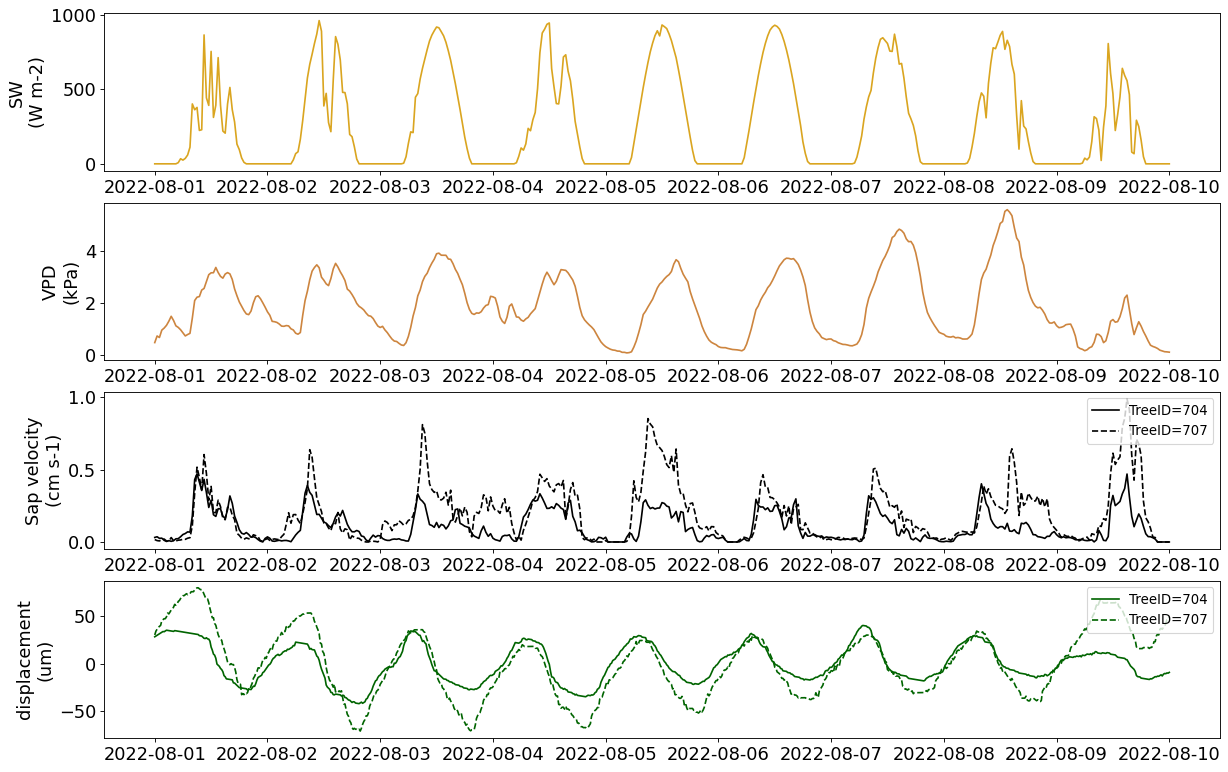

In [9]:
# plot sapflow and dendrometer data
plt.figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

st = datetime(2022,8,1); 
en = datetime(2022,8,10)

treeIDs = [704,707]
meta_data_tree = meta_data.loc[meta_data['organ']=='trunk']

plt.subplot(4,1,1)
plt.plot(met['SW_IN'][st:en],color='goldenrod')
plt.ylabel('SW\n(W m-2)')

plt.subplot(4,1,2)
plt.plot(met['vpd'][st:en],color='peru')
plt.ylabel('VPD\n(kPa)')

plt.subplot(4,1,3)
plt.plot(sapflow['u_'+str(meta_data_tree['sapflowID'][704])+'[cm3 s-1]'][st:en],color='k',label='TreeID=704')
plt.plot(sapflow['u_'+str(meta_data_tree['sapflowID'][707])+'[cm3 s-1]'][st:en],color='k',linestyle='--',label='TreeID=707')
plt.ylabel('Sap velocity\n(cm s-1)')
plt.legend(loc='upper right',fontsize=12)
    
    
plt.subplot(4,1,4)
y_dendro = signal.detrend(dendro[str(meta_data_tree['dendrometerID'][704])][st:en], axis=- 1, type='linear')
#y_dendro = dendro[str(meta_data_tree['dendrometerID'][704])][st:en] - dendro[str(meta_data_tree['dendrometerID'][704])][st]
plt.plot(dendro[st:en].index,y_dendro,color='darkgreen',label='TreeID=704',linestyle='-')
y_dendro = signal.detrend(dendro[str(meta_data_tree['dendrometerID'][707])][st:en], axis=- 1, type='linear')
#y_dendro = dendro[str(meta_data_tree['dendrometerID'][707])][st:en] - dendro[str(meta_data_tree['dendrometerID'][707])][st]
plt.plot(dendro[st:en].index,y_dendro,color='darkgreen',label='TreeID=707',linestyle='--')
plt.ylabel('displacement\n(um)')
plt.legend(loc='upper right',fontsize=12)

plt.savefig('US-Me6_dendro+sapflow_8-1-2022_8-10-2022.png',dpi=300)  

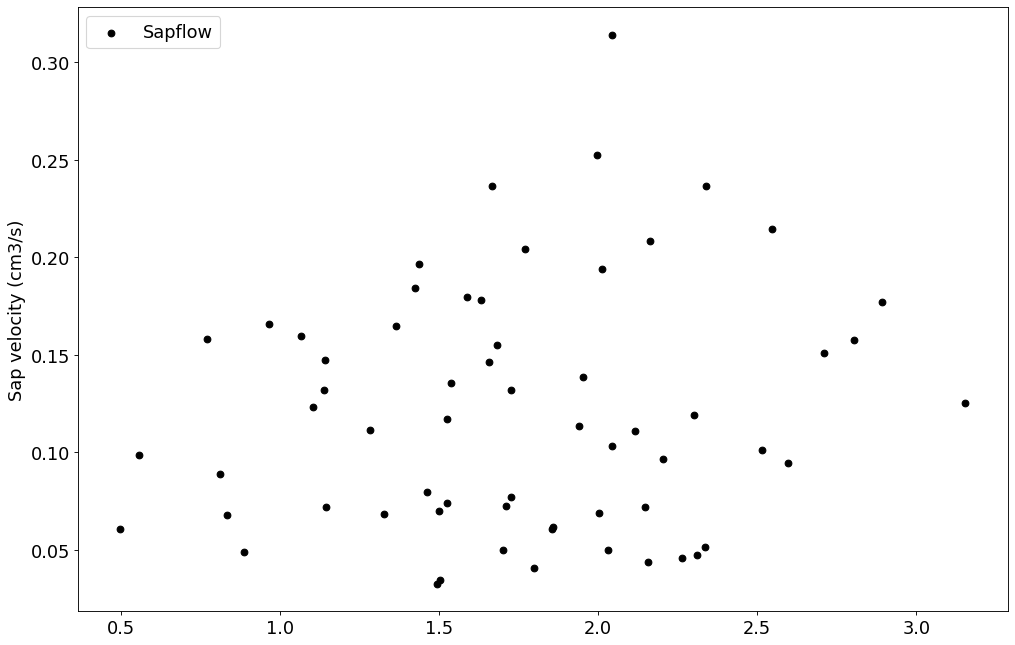

In [10]:
# plot sapflow and dendrometer data
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

start_date = datetime(2022,7,1); 
end_date = datetime(2022,8,31)

treeIDs = [710]
meta_data_tree = meta_data.loc[meta_data['organ']=='trunk']

sapflow_daily_max = sapflow.resample('D').mean()

for i,t in enumerate(treeIDs):

    ax1 = plt.subplot(1,1,i+1)
    ax1.scatter(met['vpd'][start_date:end_date].resample('D').mean(),sapflow_daily_max['u_'+str(meta_data_tree['sapflowID'][t])+'[cm3 s-1]'][start_date:end_date],color='k',label='Sapflow')
    ax1.set_ylabel('Sap velocity (cm3/s)')
    #ax2 = ax1.twinx()
    #ax2.plot(dendro[str(meta_data_tree['dendrometerID'][t])][start_date:end_date],color='darkgreen',label='Dendrometer')
    #ax2.set_ylabel('displacement (um)')
    ax1.legend(loc='upper left')
    #ax2.legend(loc='upper right')

In [11]:
# readin processed dendrometer data
in_dir = '../data/dendrometer/2022-08-29/processed/'
in_file = in_dir + 'gro_8-29-2022.csv'
gro = pd.read_csv(in_file,header=0,index_col=0, parse_dates=True, squeeze=True)
in_file = in_dir + 'twd_8-29-2022.csv'
twd = pd.read_csv(in_file,header=0,index_col=0, parse_dates=True, squeeze=True)

In [12]:
# readin processed gro data
st = datetime(2022,6,1) 
gro = pd.DataFrame(index = pd.date_range(datetime(2022,1,1),datetime(2022,12,31),freq='D'))

in_dir = '../data/dendrometer/2022-09-29/processed/'
for file in sorted(glob.iglob(f'{in_dir}'+'*.csv')):
    idx = file[41:49]
    df = pd.read_csv(file,header=0,index_col=1, parse_dates=True, squeeze=True)
    df = df['gro'].reindex_like(gro)
    #dendro[idx] = df[6][st:] - df[6][st]
    gro[idx] = df
  

In [13]:
# readin processed twd data
st = datetime(2022,6,1) 
twd = pd.DataFrame(index = pd.date_range(datetime(2022,1,1),datetime(2022,12,31),freq='D'))

in_dir = '../data/dendrometer/2022-09-29/processed/'
for file in sorted(glob.iglob(f'{in_dir}'+'*.csv')):
    idx = file[41:49]
    df = pd.read_csv(file,header=0,index_col=1, parse_dates=True, squeeze=True)
    df = df['twd'].reindex_like(twd)
    #dendro[idx] = df[6][st:] - df[6][st]
    twd[idx] = df
  

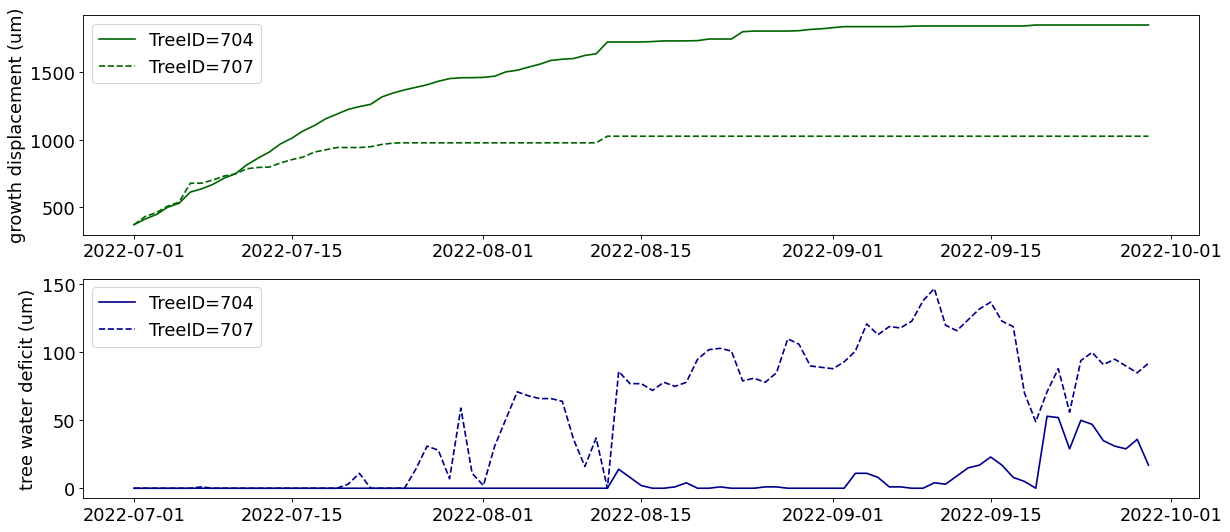

In [14]:
# plot sapflow and dendrometer data
plt.figure(num=None, figsize=(18, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

start_date = datetime(2022,7,1); 
end_date = datetime(2022,9,29)

treeIDs = [704,707]
meta_data_tree = meta_data.loc[meta_data['organ']=='trunk']

plt.subplot(2,1,1)
plt.plot(gro[str(meta_data_tree['dendrometerID'][704])][start_date:end_date],color='darkgreen',label='TreeID=704')
plt.plot(gro[str(meta_data_tree['dendrometerID'][707])][start_date:end_date],color='darkgreen',linestyle='--',label='TreeID=707')
plt.legend(loc='upper left')
plt.ylabel('growth displacement (um)')

plt.subplot(2,1,2)
plt.plot(twd[str(meta_data_tree['dendrometerID'][704])][start_date:end_date],color='darkblue',label='TreeID=704')
plt.plot(twd[str(meta_data_tree['dendrometerID'][707])][start_date:end_date],color='darkblue',linestyle='--',label='TreeID=707')
plt.legend(loc='upper left')
plt.ylabel('tree water deficit (um)')

plt.savefig('US-Me6_dendro_growth+twd_704_707_2022.png',dpi=300)  

Text(0, 0.5, 'gro (um)')

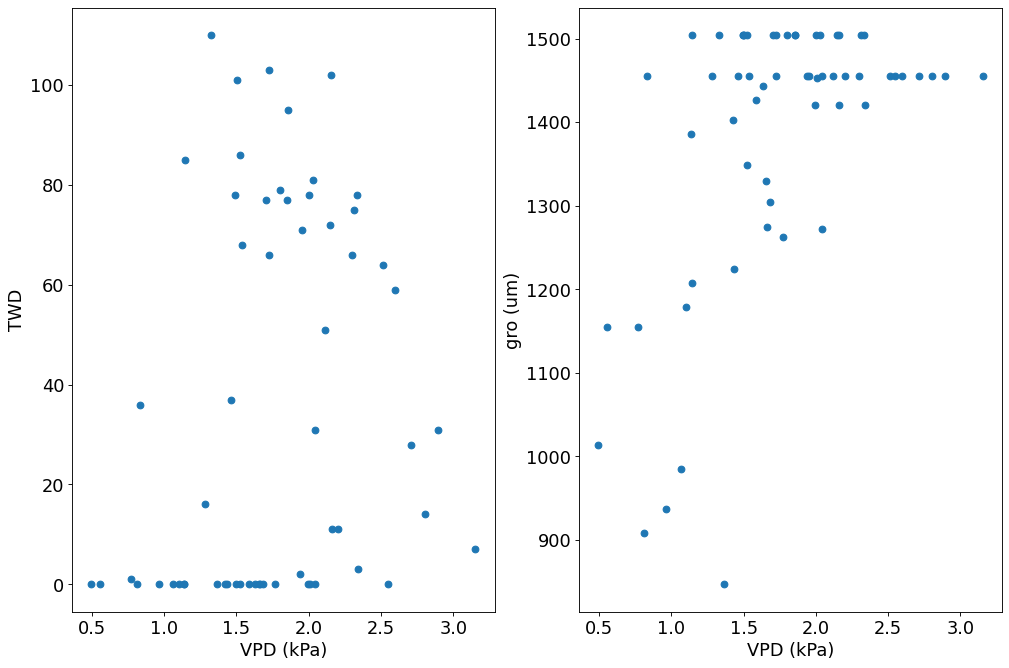

In [43]:
# plot sapflow and dendrometer data
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

start_date = datetime(2022,7,1); 
end_date = datetime(2022,8,28)

vpd = met['vpd'].resample('D').mean()

plt.subplot(1,2,1)
plt.scatter(vpd[start_date:end_date],twd['twd132'][start_date:end_date])
plt.xlabel('VPD (kPa)')
plt.ylabel('TWD')

plt.subplot(1,2,2)
plt.scatter(vpd[start_date:end_date],gro['gro132'][start_date:end_date])
plt.xlabel('VPD (kPa)')
plt.ylabel('gro (um)')

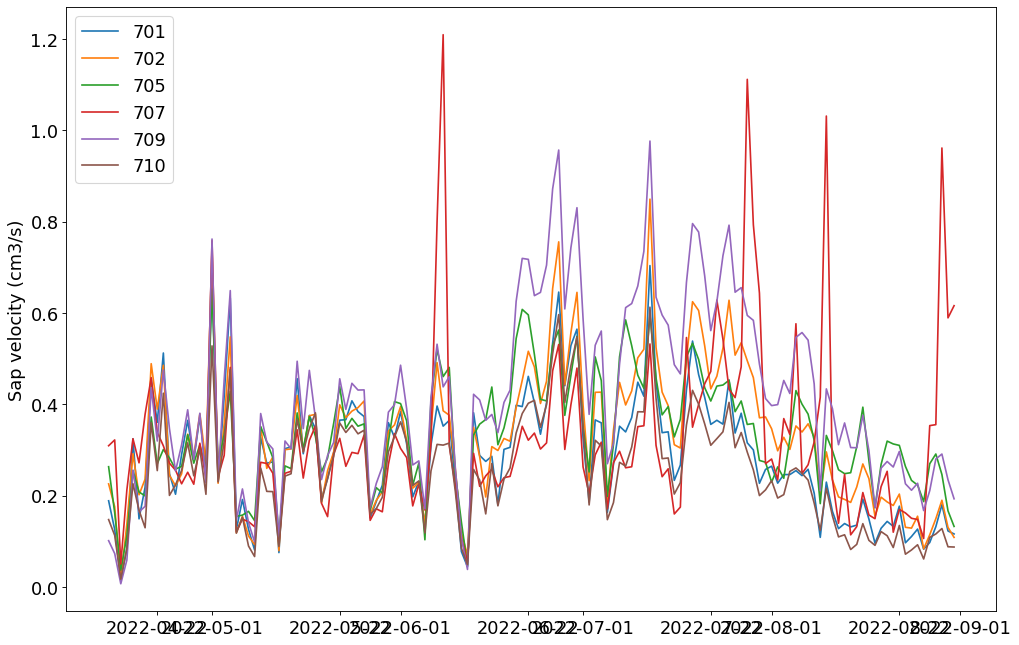

In [74]:
# plot sapflow and dendrometer data
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

start_date = datetime(2022,4,1); 
end_date = datetime(2022,8,31)

treeIDs = [701,702,705,707,709,710]
meta_data_tree = meta_data.loc[meta_data['organ']=='trunk']

sapflow_daily = sapflow.between_time('7:00','16:00').resample('D').mean()

ax1 = plt.subplot(1,1,1)
for i,t in enumerate(treeIDs):


    ax1.plot(sapflow_daily['u_'+str(meta_data_tree['sapflowID'][t])+'[cm3 s-1]'][start_date:end_date],label=t)
    ax1.set_ylabel('Sap velocity (cm3/s)')
    #ax2 = ax1.twinx()
    #ax2.plot(dendro[str(meta_data_tree['dendrometerID'][t])][start_date:end_date],color='darkgreen',label='Dendrometer')
    #ax2.set_ylabel('displacement (um)')

    #ax2.legend(loc='upper right')
ax1.legend(loc='upper left')

Text(0, 0.5, 'sap velocity (cm/s)')

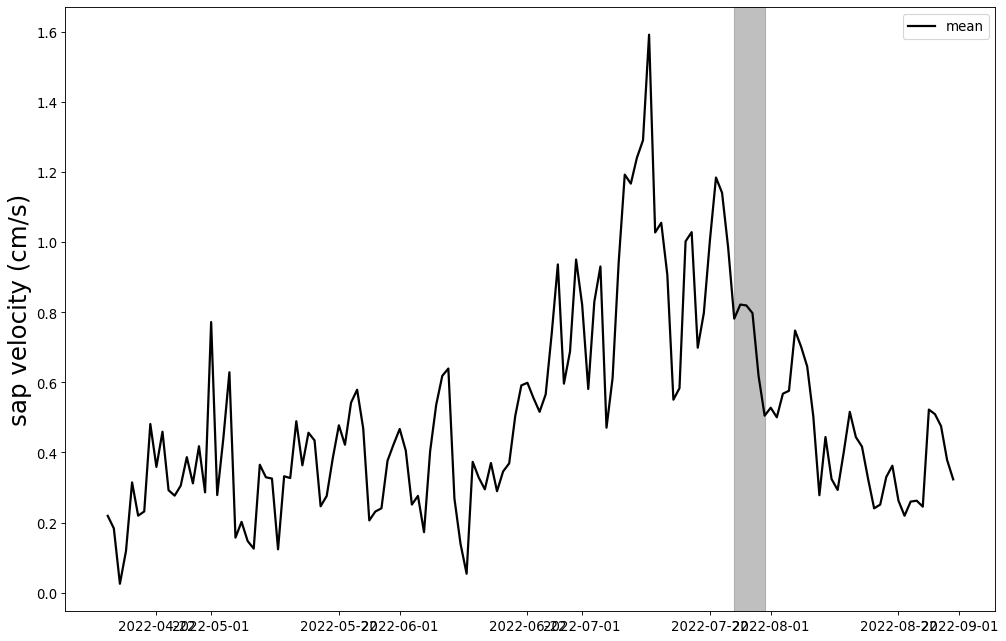

In [84]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 12})

plt.plot(sapflow_daily['u_mean[cm3 s-1]'][start_date:end_date],color='k',linewidth=2,label='mean')
plt.axvspan(datetime(2022,7,26), datetime(2022,7,31), alpha=0.5, color='grey',edgecolor=None)
plt.legend()
plt.ylabel('sap velocity (cm/s)',fontsize=22)